In [1]:
# Importing pandas and numpy for the operations on the data
import pandas as pd
import numpy as np

## <font color="Blue"> Read the dataset

In [2]:
marks=pd.read_csv("marks.txt",header=None,names=['sub1','sub2','Pass/Fail']) 
# Make sure that you download the dataset from github link 
# Place it in same folder as of this file before running or give file location
# Give the header names as those may differ in Data Set 

### <font color="Blue"> Printing the first five rows

In [3]:
marks.head()

,sub1,sub2,Pass/Fail
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### <font color="Blue"> Defining and Assigning Dependent and Independent Variables

In [4]:
X=marks.iloc[:,:2]     # Independent Variables 
Y=marks['Pass/Fail']   # Dependent Variables


## <font color="sky blue"> Importing the Matplotlib.pyplot for graphical representation of Data

In [5]:
from matplotlib import pyplot as plt

## <font color="Brown"> Importing the traintestsplit to divide the data to train and test set

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

## <font color="Sky Blue"> Import the Linear Regression to predict the classes


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
reg=LogisticRegression() #Assign model to a variable

In [10]:
reg.fit(x_train,y_train)  # Fit the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
reg.coef_ # Coefficients of the Variables in the model

array([[0.19679599, 0.20581391]])

In [12]:
reg.intercept_ # Intercept Value

array([-25.26223468])

## <font color="purple"> Predicting for the test data using the model

In [13]:
y_pred=reg.predict(x_test)

### <font color="sky blue"> Actual values of the Classes for the Test Set

In [14]:
[i for i in y_test] # List comprehension

[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1]

### <font color="sky Blue"> Pridicted classes for the Test Set

In [15]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
      dtype=int64)

## <font color="Sky Blue"> Importing the Confussion Matrix,Accuracy Metrix for checking the predictions and roc curve to check model

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

In [17]:
cm=confusion_matrix(y_test,y_pred)

In [18]:
cm

array([[8, 0],
       [4, 8]], dtype=int64)

In [19]:
probs=reg.predict_proba(x_test)
probs                 
# 1st column gives prob that the output is 0,2nd coulumn gives prob that the output to 1

array([[5.63705293e-01, 4.36294707e-01],
       [6.80180160e-01, 3.19819840e-01],
       [9.60959084e-01, 3.90409161e-02],
       [9.60617739e-01, 3.93822614e-02],
       [9.34410266e-05, 9.99906559e-01],
       [1.04787944e-03, 9.98952121e-01],
       [6.93128150e-01, 3.06871850e-01],
       [1.57148104e-01, 8.42851896e-01],
       [9.94033360e-01, 5.96664048e-03],
       [2.45004743e-01, 7.54995257e-01],
       [9.97618264e-01, 2.38173592e-03],
       [9.99109309e-01, 8.90690877e-04],
       [9.90204626e-01, 9.79537390e-03],
       [2.03364990e-04, 9.99796635e-01],
       [7.14267548e-01, 2.85732452e-01],
       [1.41627264e-01, 8.58372736e-01],
       [9.94841744e-01, 5.15825616e-03],
       [1.38109603e-02, 9.86189040e-01],
       [6.74730422e-01, 3.25269578e-01],
       [4.49883845e-04, 9.99550116e-01]])

In [20]:
from sklearn import metrics 
prob_positive=probs[:,1]                   #prob refering to 2nd column
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under Curve = %0.2f"% roc_auc) 
'''Area under curve gives information about how good is the model, For a perfect model it will be equal to 1'''

Area under Curve = 0.98


'Area under curve gives information about how good is the model, For a perfect model it will be equal to 1'

## <font color="purple"> Receiver operating characteristic curve (ROC curve)

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

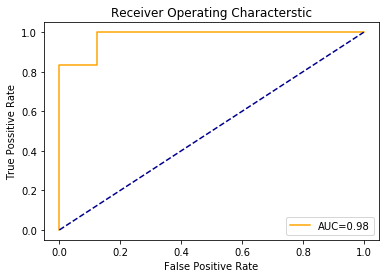

In [21]:
#plot ROC Curve
import matplotlib.pyplot as plt
plt.title("Receiver Operating Characterstic")
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')           #0.5 line or threshold line
plt.xlabel('False Positive Rate')
plt.ylabel('True Possitive Rate')
plt.show()

In [22]:
'''We can see that for the model built the Roc curve didn't touch the point (0,1) even then its a good model to use'''

"We can see that for the model built the Roc curve didn't touch the point (0,1) even then its a good model to use"

'''That's all for this time see you in next one'''

                                                                                                           Sharanu Ullegaddi